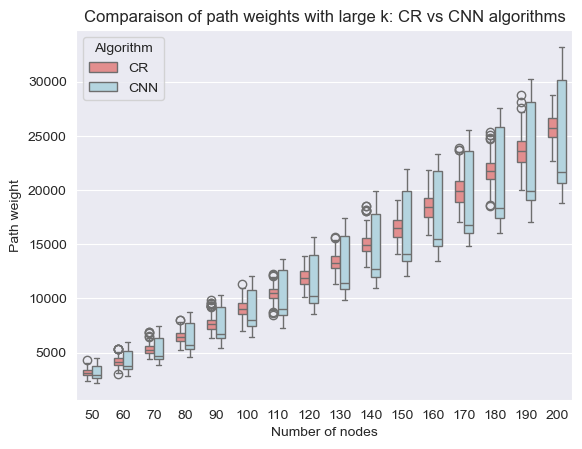

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataFrame = pd.read_csv('large_k50graph.csv')

plt.figure()
sns.boxplot(
    x="number of nodes",
    y="weight",
    hue="algorithm",
    data=dataFrame,
    palette={ "CR": "lightcoral", "CNN": "lightblue" },
    width=0.6
)

plt.title("Comparaison of path weights with large k: CR vs CNN algorithms")
plt.xlabel("Number of nodes")
plt.ylabel("Path weight")
plt.legend(title="Algorithm")

plt.show()

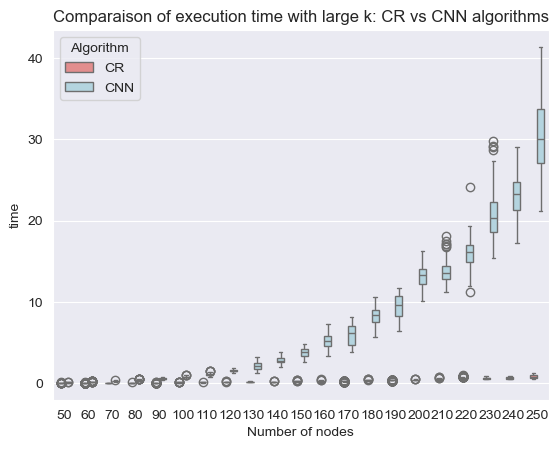

In [8]:
plt.figure()
sns.boxplot(
    x="number of nodes",
    y="run time",
    hue="algorithm",
    data=dataFrame,
    palette={ "CR": "lightcoral", "CNN": "lightblue" },
    width=0.6
)

plt.title("Comparaison of execution time with large k: CR vs CNN algorithms")
plt.xlabel("Number of nodes")
plt.ylabel("time")
plt.legend(title="Algorithm")

plt.show()

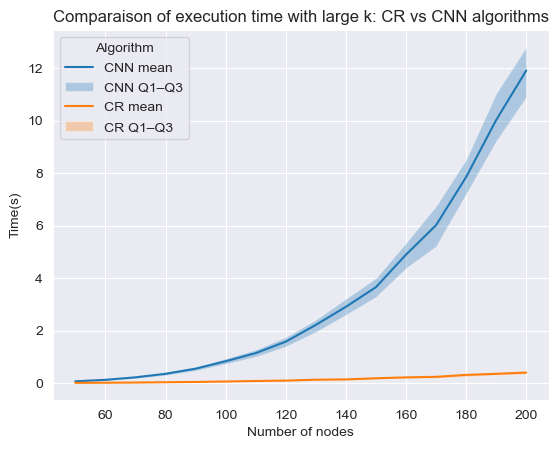

In [43]:
summary = dataFrame.groupby(['algorithm', 'number of nodes']).agg(
    q1=('run time', lambda x: x.quantile(0.25)),
    median=('run time', 'median'),
    q3=('run time', lambda x: x.quantile(0.75))
).reset_index()

fig1, ax1 = plt.subplots()
for algo in summary['algorithm'].unique():
    subset = summary[summary['algorithm'] == algo].sort_values('number of nodes')
    
    sns.lineplot(
        data=dataFrame[dataFrame['algorithm'] == algo],
        x='number of nodes',
        y='run time',
        ax=ax1,
        label=f'{algo} mean',
        errorbar=None
    )
    
    ax1.fill_between(
        subset['number of nodes'],
        subset['q1'],
        subset['q3'],
        alpha=0.3,
        label=f'{algo} Q1–Q3'
    )
ax1.set_title("Comparaison of execution time with large k: CR vs CNN algorithms")
ax1.set_xlabel("Number of nodes")
ax1.set_ylabel("Time(s)")
ax1.legend(title="Algorithm")  

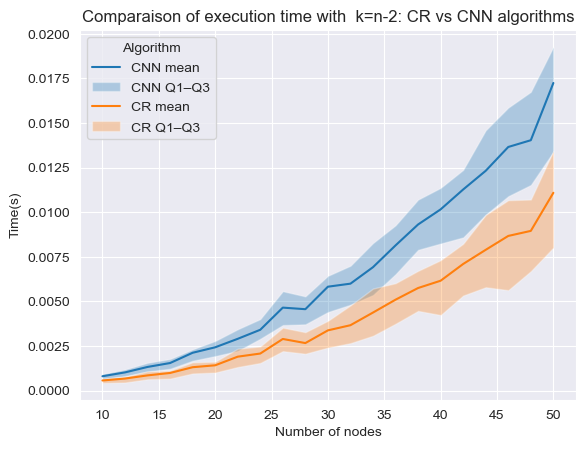

In [45]:
dataFrame = pd.read_csv('fix_k_vary_n50graph.csv')

summary = dataFrame.groupby(['algorithm', 'number of nodes']).agg(
    q1=('run time', lambda x: x.quantile(0.25)),
    median=('run time', 'median'),
    q3=('run time', lambda x: x.quantile(0.75))
).reset_index()

fig1, ax1 = plt.subplots()
for algo in summary['algorithm'].unique():
    subset = summary[summary['algorithm'] == algo].sort_values('number of nodes')
    
    sns.lineplot(
        data=dataFrame[dataFrame['algorithm'] == algo],
        x='number of nodes',
        y='run time',
        ax=ax1,
        label=f'{algo} mean',
        errorbar=None
    )
    
    ax1.fill_between(
        subset['number of nodes'],
        subset['q1'],
        subset['q3'],
        alpha=0.3,
        label=f'{algo} Q1–Q3'
    )
ax1.set_title("Comparaison of execution time with  k=n-2: CR vs CNN algorithms")
ax1.set_xlabel("Number of nodes")
ax1.set_ylabel("Time(s)")
ax1.legend(title="Algorithm")  

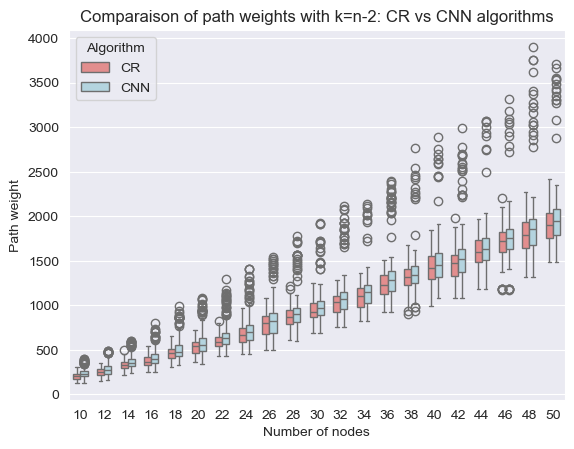

In [46]:
plt.figure()
sns.boxplot(
    x="number of nodes",
    y="weight",
    hue="algorithm",
    data=dataFrame,
    palette={ "CR": "lightcoral", "CNN": "lightblue" },
    width=0.6
)

plt.title("Comparaison of path weights with k=n-2: CR vs CNN algorithms")
plt.xlabel("Number of nodes")
plt.ylabel("Path weight")
plt.legend(title="Algorithm")

plt.show()

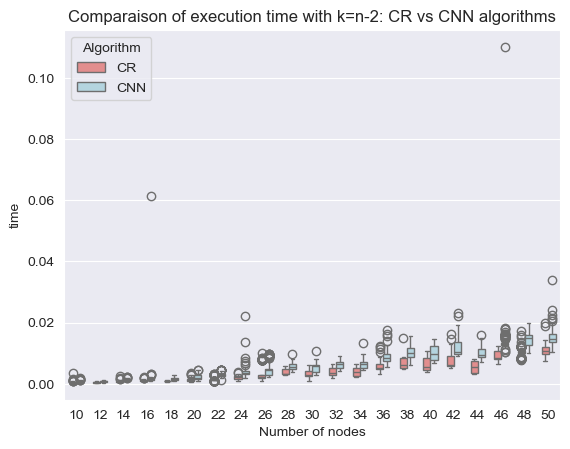

In [38]:
plt.figure()
sns.boxplot(
    x="number of nodes",
    y="run time",
    hue="algorithm",
    data=dataFrame,
    palette={ "CR": "lightcoral", "CNN": "lightblue" },
    width=0.6
)

plt.title("Comparaison of execution time with k=n-2: CR vs CNN algorithms")
plt.xlabel("Number of nodes")
plt.ylabel("time")
plt.legend(title="Algorithm")

plt.show()

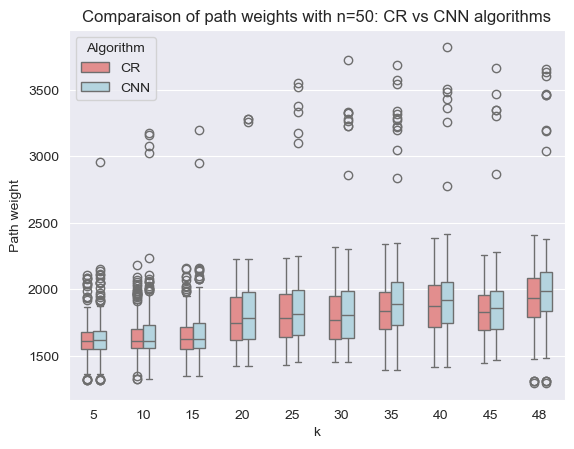

In [47]:
dataFrame = pd.read_csv('fix_n_vary_k50graph.csv')

plt.figure()
sns.boxplot(
    x="k",
    y="weight",
    hue="algorithm",
    data=dataFrame,
    palette={ "CR": "lightcoral", "CNN": "lightblue" },
    width=0.5
)

plt.title("Comparaison of path weights with n=50: CR vs CNN algorithms")
plt.xlabel("k")
plt.ylabel("Path weight")
plt.legend(title="Algorithm")


plt.show()

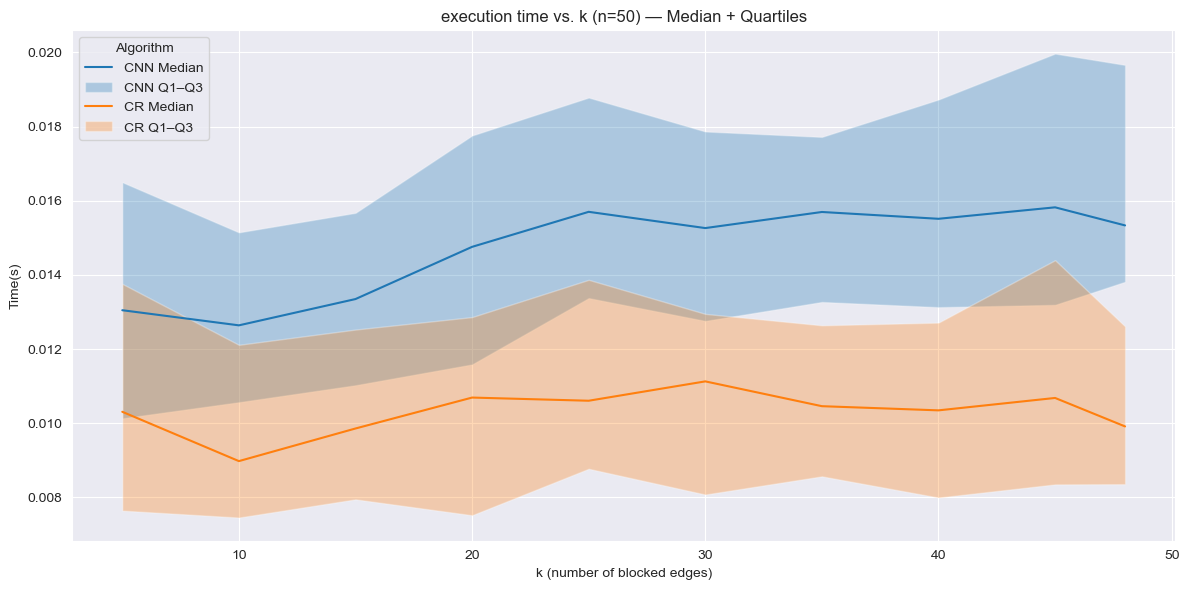

In [48]:
summary = dataFrame.groupby(['algorithm', 'k']).agg(
    q1=('run time', lambda x: x.quantile(0.25)),
    median=('run time', 'median'),
    q3=('run time', lambda x: x.quantile(0.75))
).reset_index()

plt.figure(figsize=(12, 6))
ax = plt.gca()

for algo in summary['algorithm'].unique():
    sub = summary[summary['algorithm'] == algo].sort_values('k')
    ax.plot(sub['k'], sub['median'], label=f"{algo} Median")
    ax.fill_between(sub['k'], sub['q1'], sub['q3'], alpha=0.3, label=f"{algo} Q1–Q3")

plt.title("execution time vs. k (n=50) — Median + Quartiles")
plt.xlabel("k (number of blocked edges)")
plt.ylabel("Time(s)")
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()